이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter07_working-with-keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 케라스 완전 정복

## 다양한 워크플로

## 케라스 모델을 만드는 여러 방법

### `Sequential` 모델

**`Sequential` 클래스**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2022-05-21 01:08:19.715910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**점진적으로 `Sequential` 모델 만들기**

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**가중치를 만들기 위해 모델을 호출합니다**

In [ ]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.27604327,  0.14482301, -0.13383864,  0.2496081 ,  0.02298692,
         -0.2644545 , -0.04300609,  0.15479803,  0.06796214,  0.11619413,
          0.16424641, -0.2869473 ,  0.11315668,  0.06084716,  0.2781573 ,
          0.12774187, -0.29366338, -0.03332689, -0.10949205,  0.03965226,
          0.12307516,  0.16655728, -0.22085348,  0.1490148 ,  0.2736159 ,
          0.20653635, -0.18762027, -0.19367182,  0.28457427,  0.01576456,
          0.22023559, -0.19910705, -0.24839136,  0.12013131,  0.06030121,
          0.0350343 ,  0.20901644,  0.26483476,  0.06301299,  0.25570136,
         -0.16022542, -0.2575094 ,  0.14579648, -0.11883478,  0.06449229,
         -0.28805432, -0.12940255, -0.10801359,  0.15209523, -0.01822364,
          0.00073075, -0.07820442, -0.20246324, -0.03632703,  0.19979799,
          0.2403686 ,  0.28990018, -0.14535326, -0.03718287, -0.08847181,
         -0.13021684,  0.08281183,  0.13453

**`summary` 메서드**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**`name` 매개변수로 모델과 층에 이름 지정하기**

In [ ]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**모델의 입력 크기를 미리 지정하기**

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 함수형 API

#### 간단한 예제

**두 개의 `Dense` 층을 가진 간단한 함수형 모델**

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")

In [ ]:
inputs.shape

TensorShape([None, 3])

In [ ]:
inputs.dtype

tf.float32

In [ ]:
features = layers.Dense(64, activation="relu")(inputs)

In [ ]:
features.shape

TensorShape([None, 64])

In [ ]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### 다중 입력, 다중 출력 모델

**다중 입력, 다중 출력 함수형 모델**

In [ ]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### 다중 입력, 다중 출력 모델 훈련하기

**입력과 타깃 배열 리스트를 전달하여 모델 훈련하기**

In [ ]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step


**입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기**

In [ ]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


#### 함수형 API의 장점: 층 연결 구조 활용하기

In [ ]:
keras.utils.plot_model(model, "ticket_classifier.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


**함수형 모델에 있는 층의 입력과 출력을 출력하기**

In [ ]:
model.layers

In [ ]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

**중간 층의 출력을 재사용해 새로운 모델 만들기**

In [ ]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

In [ ]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Model 서브클래싱

#### 이전 예제를 서브클래싱 모델로 다시 만들기

**간단한 서브클래싱 모델**

In [ ]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [ ]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [ ]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


#### 주의: 서브클래싱된 모델이 지원하지 않는 것

### 여러 방식을 혼합하여 사용하기

**서브클래싱한 모델을 포함하는 함수형 모델 만들기**

In [ ]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**함수형 모델을 포함하는 서브클래싱 모델 만들기**

In [ ]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### 작업에 적합한 도구 사용하기

## 내장된 훈련 루프와 평가 루프 사용하기

**표준 워크플로: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [ ]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2955 - accuracy: 0.9119 - val_loss: 0.1549 - val_accuracy: 0.9554
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1626 - accuracy: 0.9537 - val_loss: 0.1271 - val_accuracy: 0.9655
Epoch 3/3
313/313 [==============================] - 0s 1ms/step


### 사용자 정의 지표 만들기

**`Metric` 클래스를 상속하여 사용자 정의 지표 구현하기**

In [ ]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2972 - accuracy: 0.9117 - rmse: 7.1798 - val_loss: 0.1540 - val_accuracy: 0.9554 - val_rmse: 7.3602
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1641 - accuracy: 0.9536 - rmse: 7.3530 - val_loss: 0.1215 - val_accuracy: 0.9659 - val_rmse: 7.4038
Epoch 3/3
313/313 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9734 - rmse: 7.4362


### 콜백 사용하기

#### EarlyStopping 콜백과 ModelCheckpoint 콜백

**`fit()` 메서드에서 `callbacks` 매개변수 사용하기**

In [ ]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2952 - accuracy: 0.9126 - val_loss: 0.1533 - val_accuracy: 0.9567
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1644 - accuracy: 0.9540 - val_loss: 0.1268 - val_accuracy: 0.9657
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1414 - accuracy: 0.9626 - val_loss: 0.1158 - val_accuracy: 0.9707
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1238 - accuracy: 0.9680 - val_loss: 0.1101 - val_accuracy: 0.9737
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1134 - accuracy: 0.9702 - val_loss: 0.1123 - val_accuracy: 0.9758
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1109 - accuracy: 0.9731 - val_loss: 0.1204 - val_accuracy: 0.9746
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1056 - accuracy: 0.9749 - val_loss: 0.1191 - val_accuracy:

In [ ]:
model = keras.models.load_model("checkpoint_path.keras")

### 사용자 정의 콜백 만들기

**`Callback` 클래스를 상속하여 사용자 정의 콜백 만들기**

In [ ]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2954 - accuracy: 0.9124 - val_loss: 0.1550 - val_accuracy: 0.9578
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1680 - accuracy: 0.9528 - val_loss: 0.1248 - val_accuracy: 0.9666
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1398 - accuracy: 0.9625 - val_loss: 0.1149 - val_accuracy: 0.9704
Epoch 4/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.1261 - accuracy: 0.9678 - val_loss: 0.1112 - val_accuracy: 0.9725
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1167 - accuracy: 0.9709 - val_loss: 0.1198 - val_accuracy: 0.9726
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1136 - accuracy: 0.9717 - val_loss: 0.1129 - val_accuracy: 0.9751
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1033 - accuracy: 0.9751 - val_loss: 0.1134 - val_accuracy:

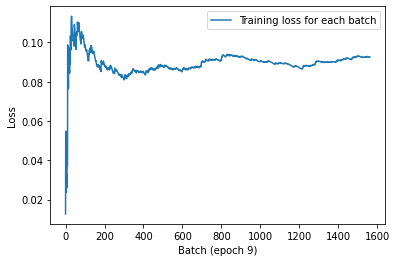

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### 텐서보드를 사용한 모니터링과 시각화

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tb_logs",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2942 - accuracy: 0.9116 - val_loss: 0.1594 - val_accuracy: 0.9537
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1637 - accuracy: 0.9530 - val_loss: 0.1238 - val_accuracy: 0.9643
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1376 - accuracy: 0.9623 - val_loss: 0.1111 - val_accuracy: 0.9719
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1268 - accuracy: 0.9672 - val_loss: 0.1122 - val_accuracy: 0.9745
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1191 - accuracy: 0.9702 - val_loss: 0.1099 - val_accuracy: 0.9743
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1105 - accuracy: 0.9718 - val_loss: 0.1130 - val_accuracy: 0.9759
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9745 - val_loss: 0.1166 - val_accuracy:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

## 사용자 정의 훈련, 평가 루프 만들기

### 훈련 vs 추론

### 측정 지표의 저수준 사용법

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"결과: {current_result:.2f}")

결과: 1.00


In [ ]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"평균 지표: {mean_tracker.result():.2f}")

평균 지표: 2.00


### 완전한 훈련과 평가 루프

**단계별 훈련 루프 작성하기: 훈련 스텝 함수**

In [ ]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**단계별 훈련 루프 작성하기: 지표 재설정**

In [ ]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**단계별 훈련 루프 작성하기: 훈련 루프 자체**

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9143
...loss: 0.2908
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9534
...loss: 0.1669
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9634
...loss: 0.1408


**단계별 평가 루프 작성하기**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9668
...val_loss: 0.1312


### tf.function로 성능 높이기

**평가 스텝 함수에 `@tf.function` 데코레이터 추가하기**

In [ ]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9668
...val_loss: 0.1312


### fit() 메서드를 사용자 정의 훈련 루프로 활용하기

**`fit()`이 사용할 사용자 정의 훈련 스텝 구현하기**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2932
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1635
Epoch 3/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1372


In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2973 - sparse_categorical_accuracy: 0.9119
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1667 - sparse_categorical_accuracy: 0.9529
Epoch 3/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1410 - sparse_categorical_accuracy: 0.9626


## 요약